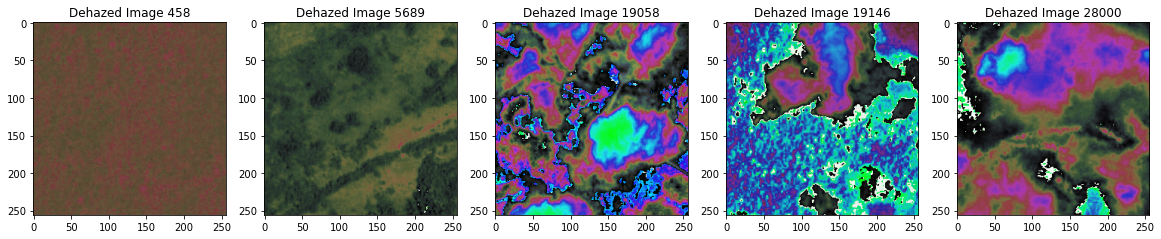

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# List of image indexes to dehaze
Hazy_img_idx = [458,5689,19058,19146,28000]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(Hazy_img_idx), figsize=(20,10))

for i, ax in enumerate(axes.flatten()):
    path = 'train-jpg/'
    filename = 'train_{}.jpg'.format(Hazy_img_idx[i])
    img = cv2.imread(path+filename)
    img_hsi = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_intensity = img_hsi[:, :, 2]
    atmospheric_light = np.percentile(img_intensity, 99.9)
    transmission = 1 - (img_intensity / atmospheric_light)
    img_dehazed = img.astype(np.float32) / 255
    img_dehazed[:, :, 0] = (img_dehazed[:, :, 0] - transmission) / (1 - transmission)
    img_dehazed[:, :, 1] = (img_dehazed[:, :, 1] - transmission) / (1 - transmission)
    img_dehazed[:, :, 2] = (img_dehazed[:, :, 2] - transmission) / (1 - transmission)
    img_dehazed = img_dehazed * 255
    img_dehazed = img_dehazed.astype(np.uint8)
    img_dehazed = np.clip(img_dehazed, 0, 255)
    img_dehazed = cv2.cvtColor(img_dehazed, cv2.COLOR_HSV2BGR)
    ax.imshow(img_dehazed)
    ax.set_title("Dehazed Image {}".format(Hazy_img_idx[i]))
plt.show()
